In [1]:
import base_wavelet_model
import tensorflow as tf
import pickle
import tensorflow.keras as keras
from importlib import reload
import novel_activations
import os
import hypothesis_tests
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [2]:
reload(hypothesis_tests)

<module 'hypothesis_tests' from 'c:\\Users\\anash\\Downloads\\fyp\\Experiments\\hypothesis_tests.py'>

In [3]:
def experiment_completed(exp_name):
    return "result_plots.png" in os.listdir("Tensorboard/"+exp_name)

# Empirical Experiments

## Comparing Losses

In [4]:
allmodels = os.listdir("Tensorboard")

# differentiators for different experiments
key_indications = ["Stanford", "Wavelet Style", "Trainable Wavelet"]
full_names = ["ResNet", "Compact Wavelet-Residual", "Wavelet"]
hyps = {}
labels = {}

for name in key_indications:
    models =[x for x in allmodels if experiment_completed(x) and name in x and 'kernel' not in name]

    hyp = hypothesis_tests.HypothesisTest(models[0])
    mod_names=[models[0] for _ in range(len(hyp.get_val_loss()))]
    for i in range(1, len(models)):
        oldlen=len(hyp.get_val_loss())
        hyp.combine(models[i])
        mod_names+=[models[i] for _ in range(len(hyp.get_val_loss())-oldlen)]

    hyps[name] = hyp
    labels[name] = mod_names


Text(0, 0.5, 'Validation cross-entropy loss')

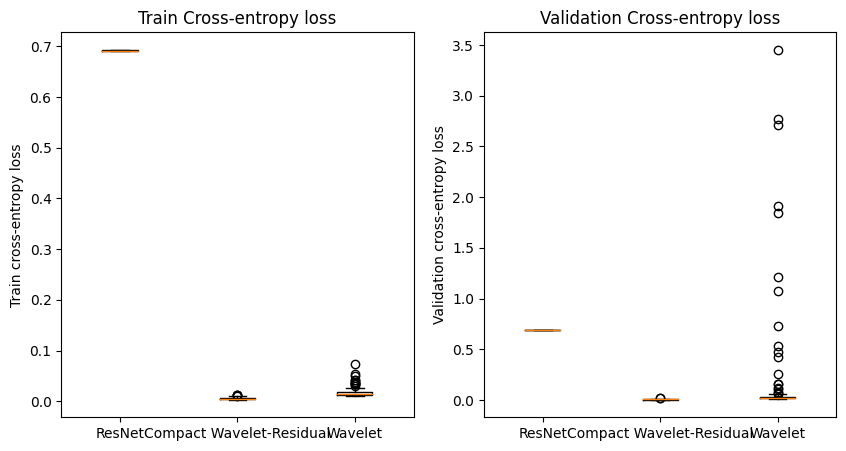

In [88]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].boxplot( [hyps[x].get_train_loss() for x in key_indications])
ax[0].set_title("Train Cross-entropy loss")
ax[0].set_xticks(range(1,1+len(hyps)),full_names)
ax[0].set_ylabel("Train cross-entropy loss")
ax[1].boxplot( [hyps[x].get_val_loss() for x in key_indications])
ax[1].set_title("Validation Cross-entropy loss")
ax[1].set_xticks(range(1,1+len(hyps)),full_names)
ax[1].set_ylabel("Validation cross-entropy loss")

Text(0, 0.5, 'Validation cross-entropy loss')

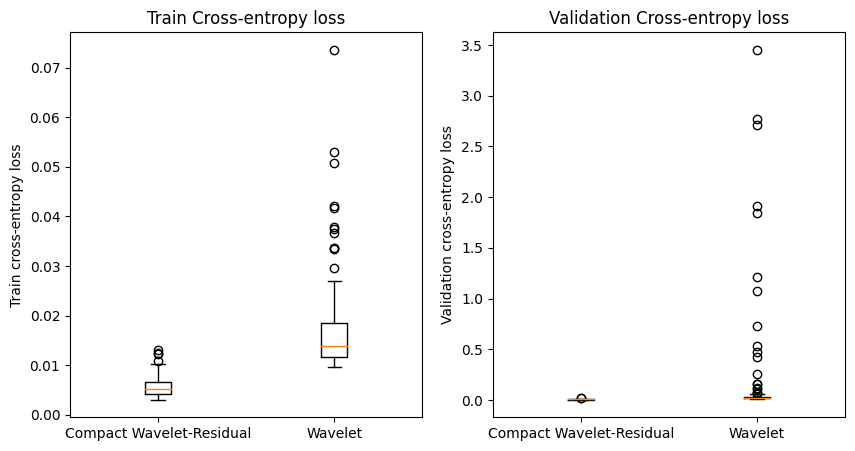

In [47]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].boxplot( [hyps[x].get_train_loss() for x in key_indications[1:]])
ax[0].set_title("Train Cross-entropy loss")
ax[0].set_xticks(range(1,len(hyps)),full_names[1:])
ax[0].set_ylabel("Train cross-entropy loss")
ax[1].boxplot( [hyps[x].get_val_loss() for x in key_indications[1:]])
ax[1].set_title("Validation Cross-entropy loss")
ax[1].set_xticks(range(1,len(hyps)),full_names[1:])
ax[1].set_ylabel("Validation cross-entropy loss")

# Model optimisation

The lack of variabolity in the ResNet mdoels result in a lack of a need to choose an omtimal model.

However, there is a greater degree of variability beween the waveet models.


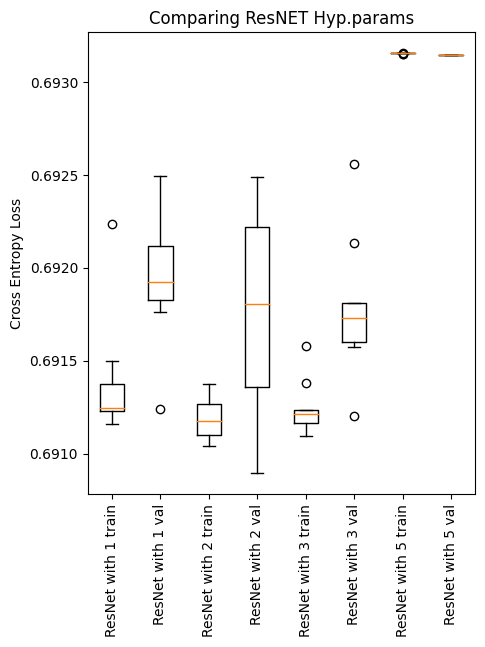

In [68]:
x="Stanford"
boxes = []
names = []
mapping = {}
for i in range(len(hyps[x].get_val_loss())):
    lab = labels[x][i]
    if lab not in mapping:
        mapping[lab] = len(boxes)
        boxes.append([])
        boxes.append([])
        names.append(' '.join(lab.split()[-4:]).replace(" blocks", "")+ " train")
        names.append(' '.join(lab.split()[-4:]).replace(" blocks", "")+" val")
    boxes[mapping[lab]].append(hyps[x].get_train_loss()[i])
    boxes[mapping[lab]+1].append(hyps[x].get_val_loss()[i])
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.title("Comparing ResNET Hyp.params")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()


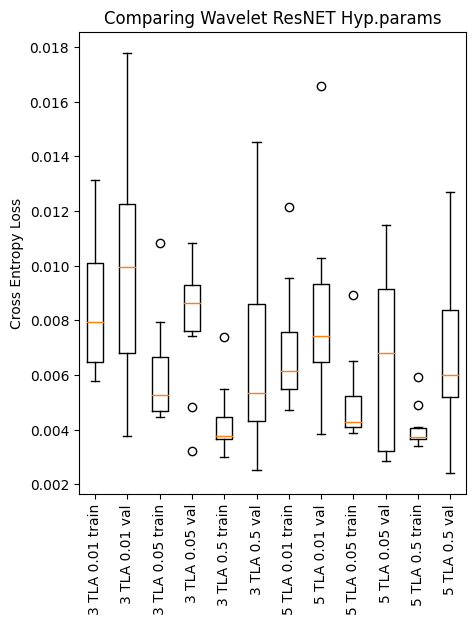

In [66]:
x="Wavelet Style"
boxes = []
names = []
mapping = {}
for i in range(len(hyps[x].get_val_loss())):
    lab = labels[x][i]
    if lab not in mapping:
        mapping[lab] = len(boxes)
        boxes.append([])
        boxes.append([])
        names.append(' '.join(lab.split()[-4:]).replace(" blocks", "")+ " train")
        names.append(' '.join(lab.split()[-4:]).replace(" blocks", "")+" val")
    boxes[mapping[lab]].append(hyps[x].get_train_loss()[i])
    boxes[mapping[lab]+1].append(hyps[x].get_val_loss()[i])
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.title("Comparing Wavelet ResNET Hyp.params")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()


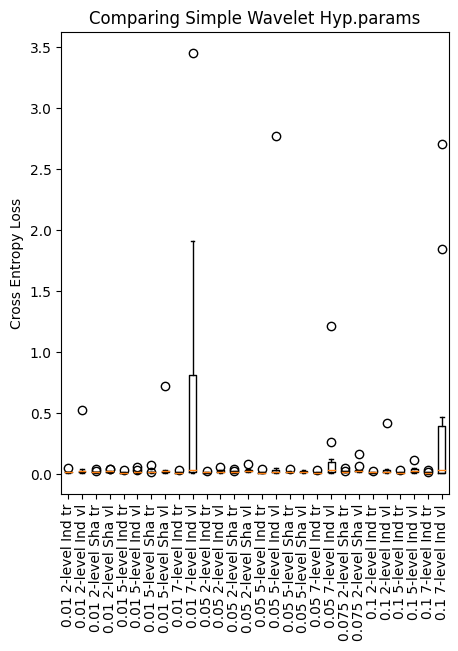

In [82]:
x="Trainable Wavelet"
boxes = []
names = []
mapping = {}
for i in range(len(hyps[x].get_val_loss())):
    lab = labels[x][i]
    if lab not in mapping:
        mapping[lab] = len(boxes)
        boxes.append([])
        boxes.append([])
        exp_name = lab.split()
        exp_name = ' '.join(exp_name[3:5])+' '+exp_name[5][:3]
        names.append(exp_name+ " tr")
        names.append(exp_name+" vl")
    boxes[mapping[lab]].append(hyps[x].get_train_loss()[i])
    boxes[mapping[lab]+1].append(hyps[x].get_val_loss()[i])
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.title("Comparing Simple Wavelet Hyp.params")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()


In [80]:
%matplotlib inline

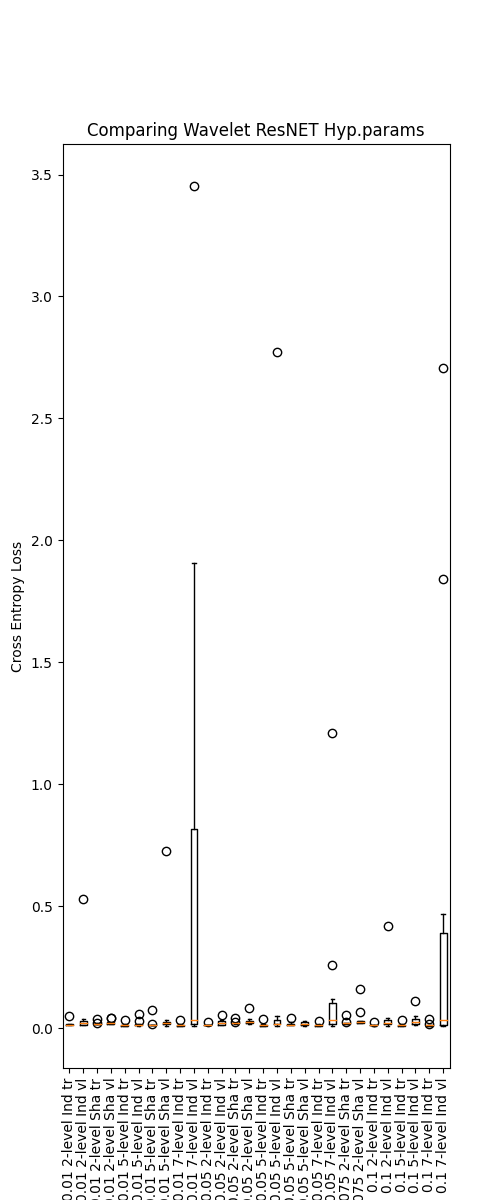

In [79]:
x="Trainable Wavelet"
boxes = []
names = []
mapping = {}
for i in range(len(hyps[x].get_val_loss())):
    lab = labels[x][i]
    if lab not in mapping:
        mapping[lab] = len(boxes)
        boxes.append([])
        boxes.append([])
        exp_name = lab.split()
        exp_name = ' '.join(exp_name[3:5])+' '+exp_name[5][:3]
        names.append(exp_name+ " tr")
        names.append(exp_name+" vl")
    boxes[mapping[lab]].append(hyps[x].get_train_loss()[i])
    boxes[mapping[lab]+1].append(hyps[x].get_val_loss()[i])
plt.figure(figsize=(5,12))
plt.boxplot(boxes)
plt.title("Comparing Wavelet ResNET Hyp.params")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()


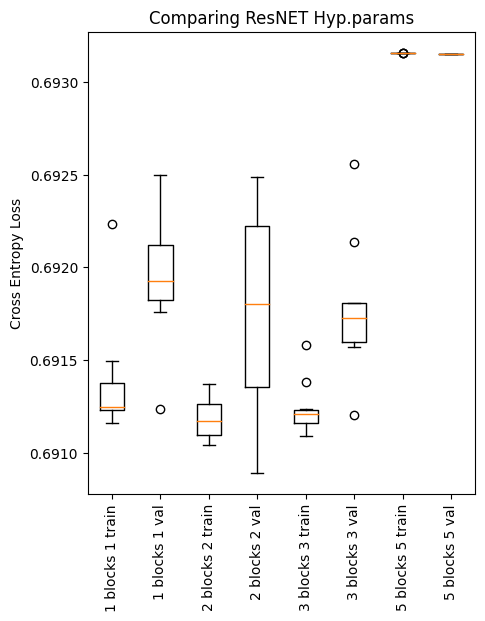

In [95]:
x="Stanford"
boxes = []
names = []
mapping = {}
for i in range(len(hyps[x].get_val_loss())):
    lab = labels[x][i]
    if lab not in mapping:
        mapping[lab] = len(boxes)
        boxes.append([])
        boxes.append([])
        exp_name = lab.split()
        exp_name = ' '.join(exp_name[-2:])+' '+exp_name[5][:3]
        names.append(exp_name+ " train")
        names.append(exp_name+" val")
    boxes[mapping[lab]].append(hyps[x].get_train_loss()[i])
    boxes[mapping[lab]+1].append(hyps[x].get_val_loss()[i])
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.title("Comparing ResNET Hyp.params")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()


### More Sophisticated Wavelet ResNET

Choose 5 0.05 with 32 and 64 kernels

# WARNING ERROR IN VALUES

In [ ]:
name = x = "kernels"
models =[x for x in allmodels if experiment_completed(x) and name in x]

hyp = hypothesis_tests.HypothesisTest(models[0])
mod_names=[models[0] for _ in range(len(hyp.get_val_loss()))]
for i in range(1, len(models)):
    oldlen=len(hyp.get_val_loss())
    hyp.combine(models[i])
    mod_names+=[models[i] for _ in range(len(hyp.get_val_loss())-oldlen)]

boxes = []
names = []
mapping = {}
for i in range(len(hyp.get_val_loss())):
    lab = mod_names[i]
    if lab not in mapping:
        mapping[lab] = len(boxes)
        boxes.append([])
        boxes.append([])
        exp_name = lab.split()
        exp_name = exp_name[-2]
        names.append(exp_name+ " train")
        names.append(exp_name+" val")
    boxes[mapping[lab]].append(hyp.get_train_loss()[i])
    boxes[mapping[lab]+1].append(hyp.get_val_loss()[i])
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.title("Comparing ResNET Hyp.params")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()

## Evaluate Further metrics on our chosen set of models

Consider the loss over solely the true R peak locations

Effectively, looking at the false negative rate - to verify that the wavelet models aren't overly biased in favour of generating a "flat" prediction

In [5]:
def create_hyp(l):
    m = hypothesis_tests.HypothesisTest(l[0])
    for i in range(1, len(l)):
        m.combine(l[i])
    return m

In [6]:
resnetMods = [
    "Stanford ML Style ResNet with 1 blocks", "Stanford ML Style ResNet with 2 blocks", "Stanford ML Style ResNet with 3 blocks"
]
resnetExp = create_hyp(resnetMods)

smallWaveletResnetMods = ["Wavelet Style ResNet with 5 blocks TLA 0.05"]
smallWaveletResnetExp = create_hyp(smallWaveletResnetMods)

fullWaveletResnetMods = ["Wavelet Full ResNet with 5 blocks TLA 0.05 - 32 kernels"]
fullWaveletResnetExp = create_hyp(fullWaveletResnetMods)

hardCodedWaveletIndMods = ["TLA Min Grad 0.01 5-level Independent Trainable Wavelet", "TLA Min Grad 0.05 5-level Independent Trainable Wavelet"]
hardCodedWaveletIndExp = create_hyp(hardCodedWaveletIndMods)
hardCodedWaveletQMFMods = ["TLA Min Grad 0.01 5-level Independent Trainable Wavelet", "TLA Min Grad 0.05 5-level Shared QMF Trainable Wavelet"]
hardCodedWaveletQMFExp = create_hyp(hardCodedWaveletQMFMods)

#### Overall Losses

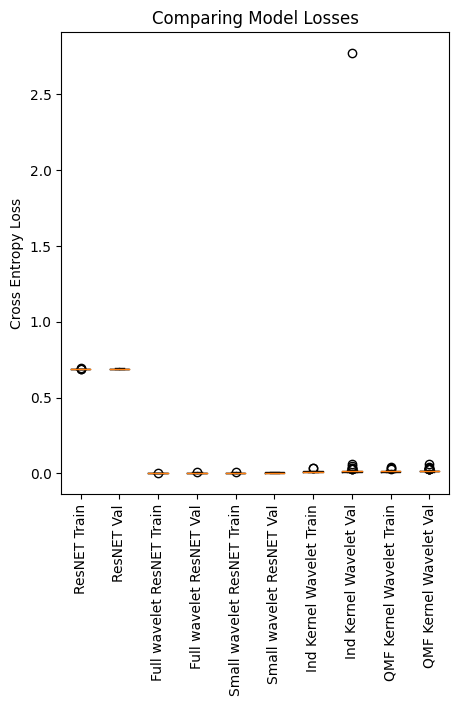

In [7]:
mods = ["ResNET", "Full wavelet ResNET", "Small wavelet ResNET", "Ind Kernel Wavelet", "QMF Kernel Wavelet"]
exps = [resnetExp, fullWaveletResnetExp, smallWaveletResnetExp,hardCodedWaveletIndExp,hardCodedWaveletQMFExp]
boxes = [[] for i in range(len(mods*2))]
names = []
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    boxes[i*2]=np.concatenate([boxes[i*2], hyp.get_train_loss()])
    boxes[i*2 + 1]=np.concatenate([boxes[i*2], hyp.get_val_loss()])
    #boxes[mapping[lab]+1].append(hyp.get_val_loss()[i])
    names.append(lab+' Train')
    names.append(lab+' Val')
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.title("Comparing Model Losses")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()

In [118]:
%matplotlib inline

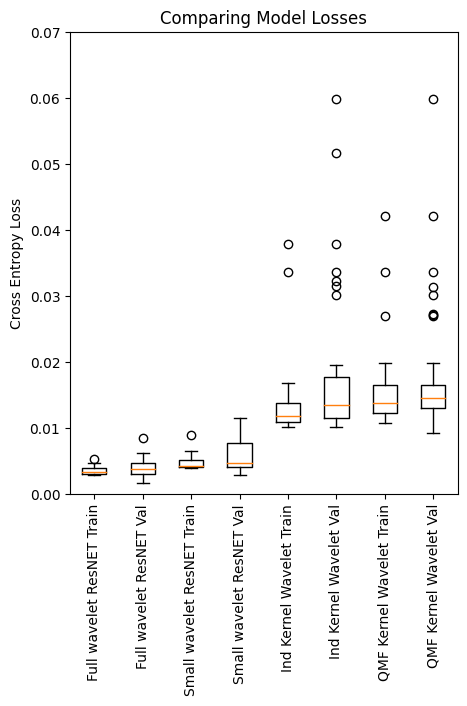

In [8]:
mods = ["Full wavelet ResNET", "Small wavelet ResNET", "Ind Kernel Wavelet", "QMF Kernel Wavelet"]
exps = [ fullWaveletResnetExp, smallWaveletResnetExp,hardCodedWaveletIndExp,hardCodedWaveletQMFExp]
boxes = [[] for i in range(len(mods*2))]
names = []
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    boxes[i*2]=np.concatenate([boxes[i*2], hyp.get_train_loss()])
    boxes[i*2 + 1]=np.concatenate([boxes[i*2], hyp.get_val_loss()])
    #boxes[mapping[lab]+1].append(hyp.get_val_loss()[i])
    names.append(lab+' Train')
    names.append(lab+' Val')
plt.figure(figsize=(5,6))
plt.boxplot(boxes)
plt.ylim(0,0.07)
plt.title("Comparing Model Losses")
plt.ylabel("Cross Entropy Loss")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()

#### Loss only on the validation R peak locations

0 of 30, 10 of 30, 20 of 30, 0 of 10, 0 of 10, 0 of 20, 10 of 20, 0 of 20, 10 of 20, 

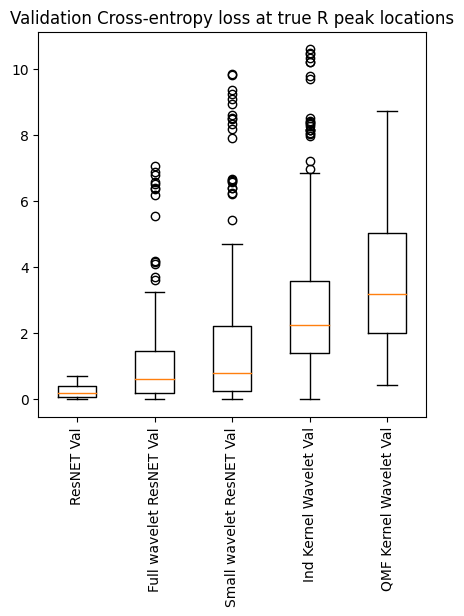

In [9]:
mods = ["ResNET","Full wavelet ResNET", "Small wavelet ResNET", "Ind Kernel Wavelet", "QMF Kernel Wavelet"]
exps = [resnetExp, fullWaveletResnetExp, smallWaveletResnetExp,hardCodedWaveletIndExp,hardCodedWaveletQMFExp]
boxes = [[] for i in range(len(mods))]
names = []
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    boxes[i]=hyp.get_r_peak_loss()
    names.append(lab+' Val')
plt.figure(figsize=(5,5))
plt.boxplot( boxes)
plt.title("Validation Cross-entropy loss at true R peak locations")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()

In [32]:
scipy.stats.mannwhitneyu(resnetExp.get_r_peak_loss(), fullWaveletResnetExp.get_r_peak_loss(), alternative="less")

MannwhitneyuResult(statistic=29072.0, pvalue=3.407819465628007e-23)

Significantly lower c.v. validation loss

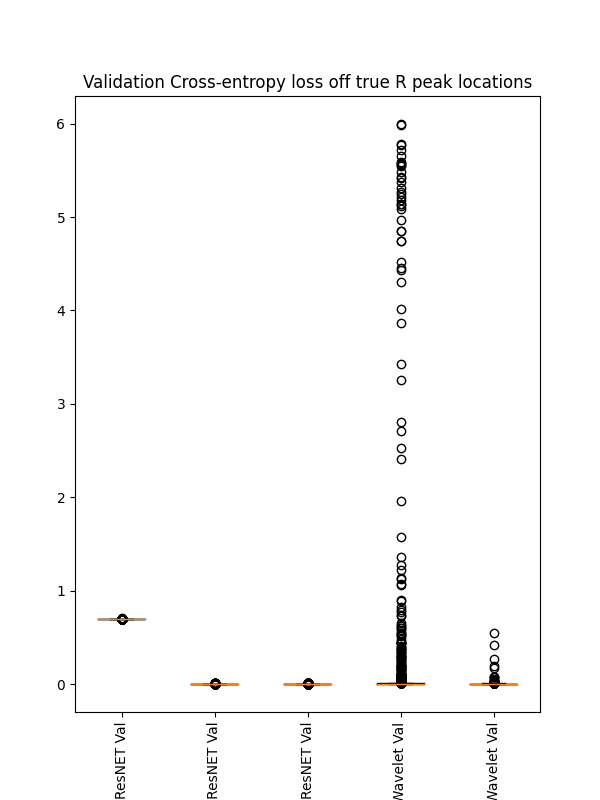

In [50]:
mods = ["ResNET","Full wavelet ResNET", "Small wavelet ResNET", "Ind Kernel Wavelet", "QMF Kernel Wavelet"]
exps = [resnetExp, fullWaveletResnetExp, smallWaveletResnetExp,hardCodedWaveletIndExp,hardCodedWaveletQMFExp]
boxes = [[] for i in range(len(mods))]
names = []
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    boxes[i]=np.concatenate([boxes[i], hyp.get_non_r_peak_loss()])
    names.append(lab+' Val')
plt.figure(figsize=(5,5))
plt.boxplot( boxes)
plt.title("Validation Cross-entropy loss off true R peak locations")
plt.xticks(range(1,len(names)+1),names, rotation="vertical")
plt.show()

In [35]:
scipy.stats.mannwhitneyu(resnetExp.get_non_r_peak_loss(), fullWaveletResnetExp.get_non_r_peak_loss(), alternative="greater")

MannwhitneyuResult(statistic=8957952.0, pvalue=0.0)

In [42]:
scipy.stats.mannwhitneyu(np.concatenate(fullWaveletResnetExp.preds), np.concatenate(resnetExp.preds), alternative="greater")

MannwhitneyuResult(statistic=3435117.0, pvalue=1.0)

In [43]:
scipy.stats.mannwhitneyu(np.concatenate(fullWaveletResnetExp.trues), np.concatenate(resnetExp.trues), alternative="less")

MannwhitneyuResult(statistic=34799023426.5, pvalue=0.0)

Significantly higher loss on non R peaks

Caused by signficicantly lower R peak predictions, and non-R peak predictions

##### Distributions of Predictions

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

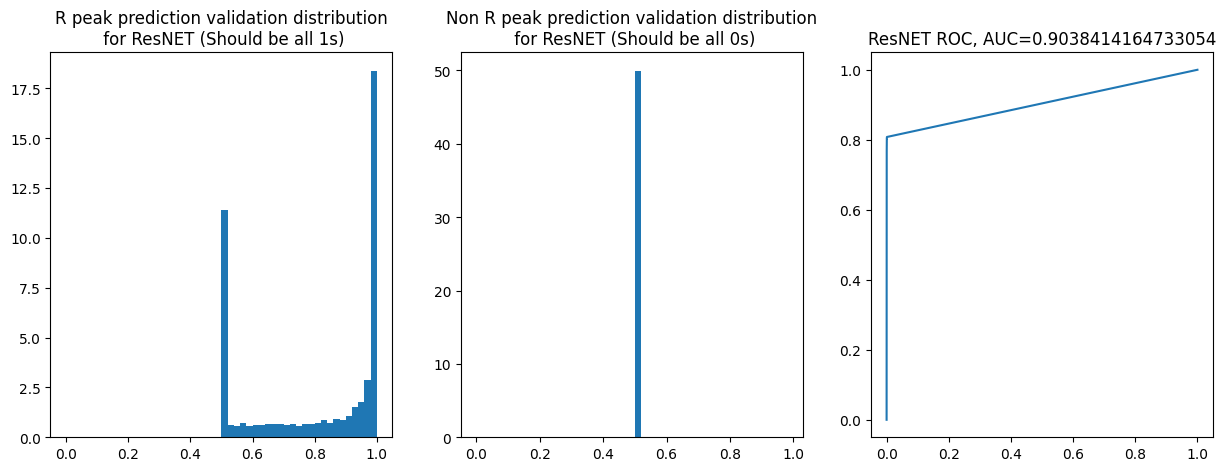

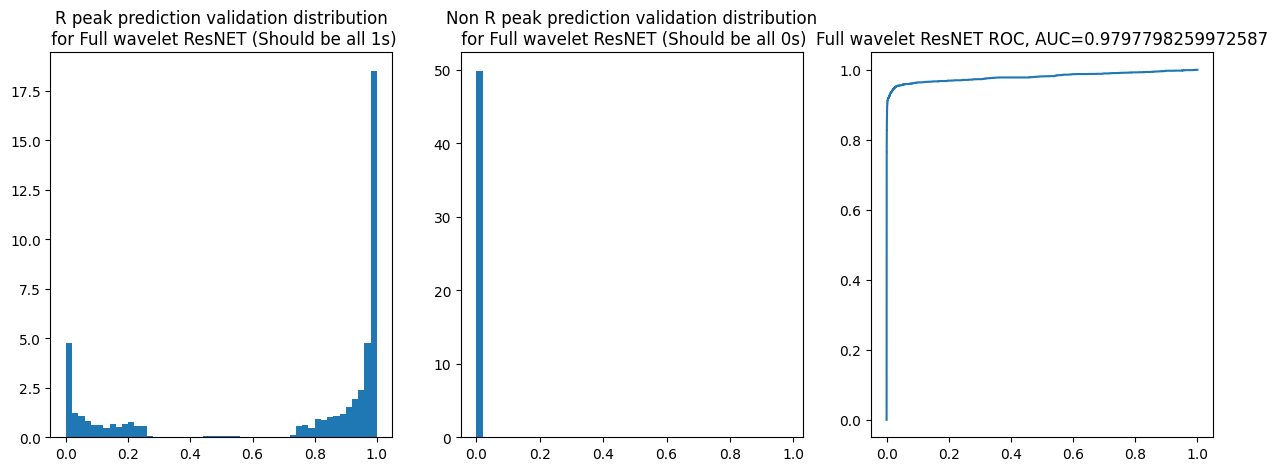

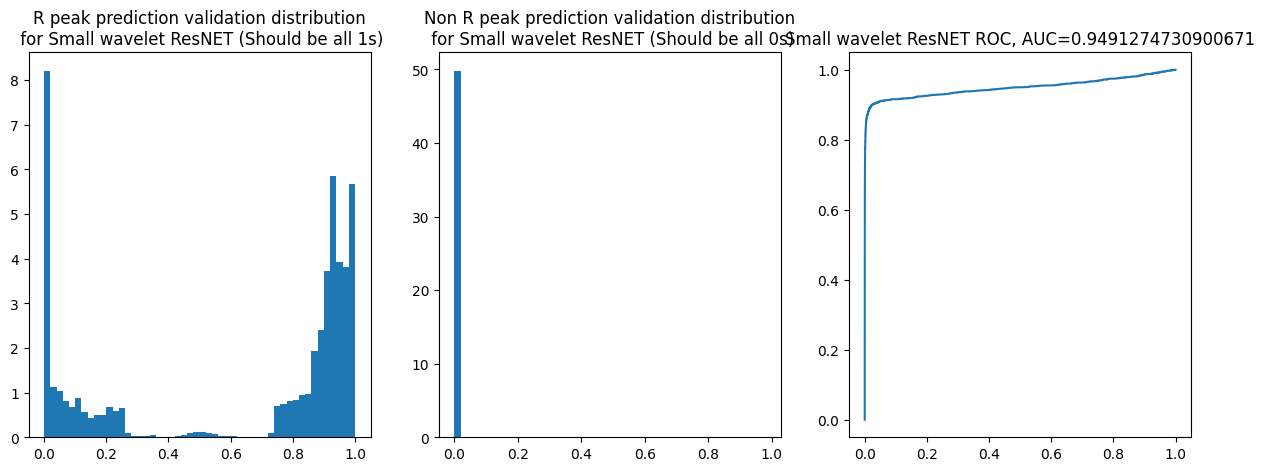

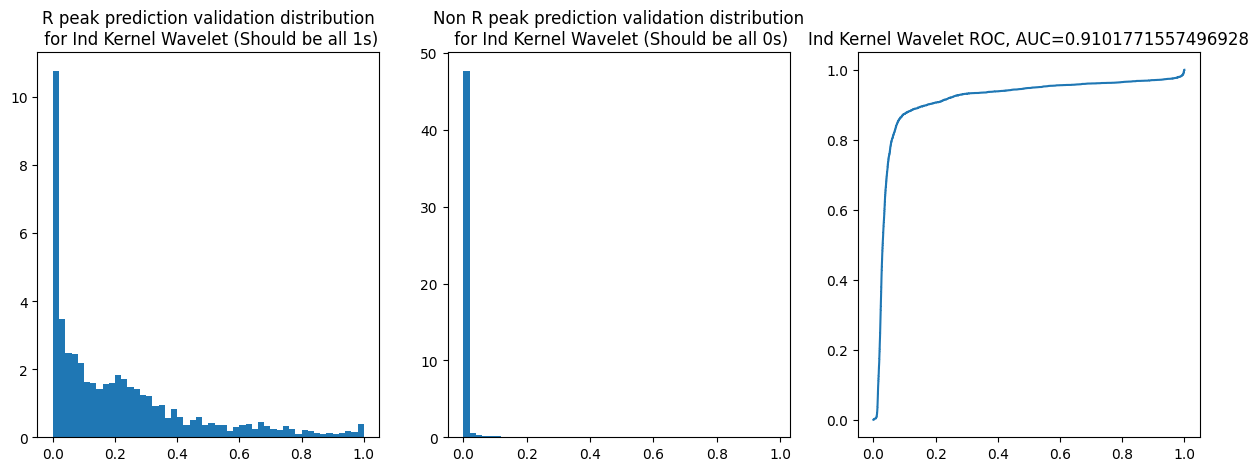

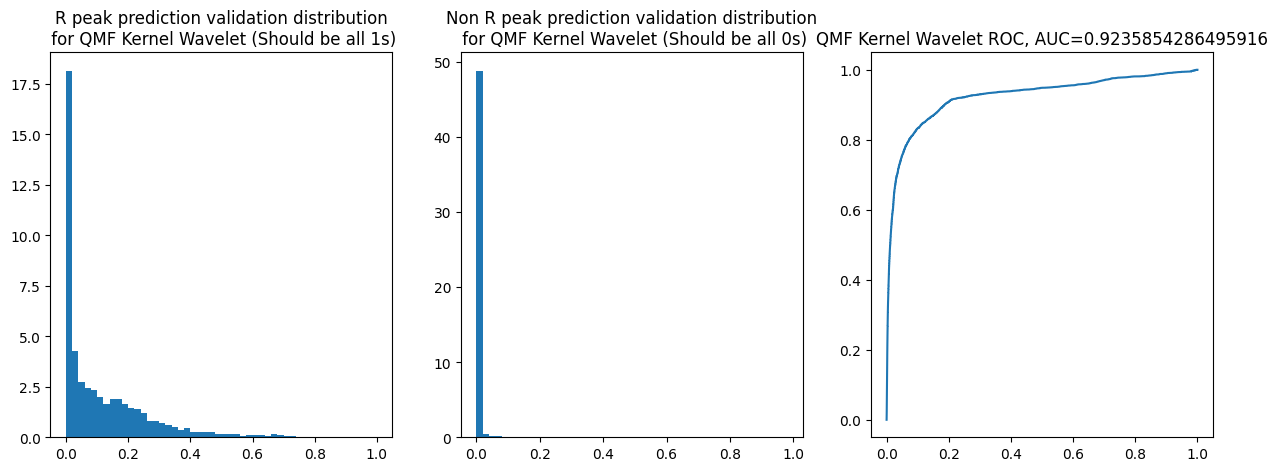

In [14]:
mods = ["ResNET","Full wavelet ResNET", "Small wavelet ResNET", "Ind Kernel Wavelet", "QMF Kernel Wavelet"]
exps = [resnetExp, fullWaveletResnetExp, smallWaveletResnetExp,hardCodedWaveletIndExp,hardCodedWaveletQMFExp]
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    preds=np.concatenate(hyp.preds)
    fig,ax=plt.subplots(1, 3,figsize=(15,5))
    ax[0].hist(preds,bins=np.arange(0, 1.02, 0.02),density=True)
    ax[0].set_title(f"R peak prediction validation distribution\n for {lab} (Should be all 1s)")
    

    trues=np.concatenate(hyp.trues)
    ax[1].hist(trues,bins=np.arange(0, 1, 0.02),density=True)
    ax[1].set_title(f"Non R peak prediction validation distribution\n for {lab} (Should be all 0s)")

    fp, tp, _ = roc_curve([1.0 for i in range(len(preds))]+[0.0 for i in range(len(trues))],np.concatenate([preds,trues]))
    auc = roc_auc_score([1.0 for i in range(len(preds))]+[0.0 for i in range(len(trues))],np.concatenate([preds,trues]))
    ax[2].plot(fp, tp)
    ax[2].set_title(f"{lab} ROC, AUC={auc}")
    plt.show()

#### Comparing the ResNET Models

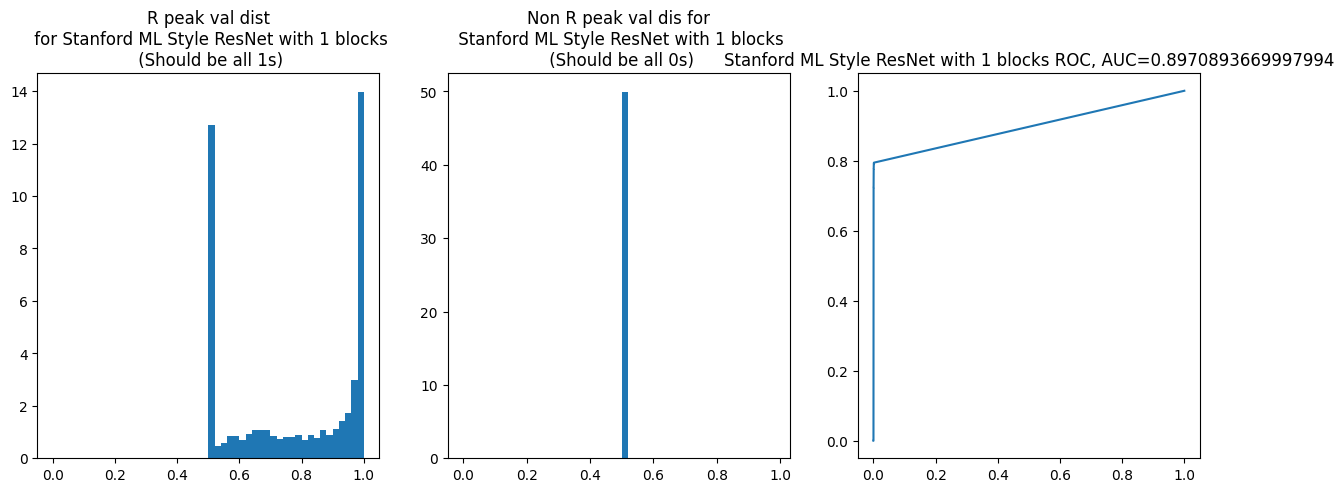

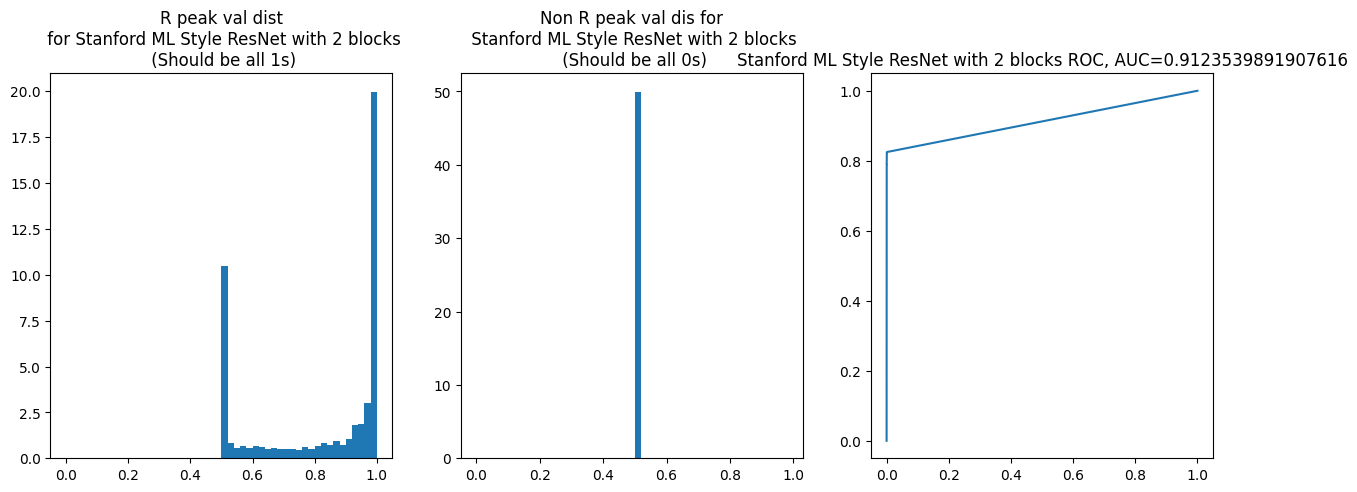

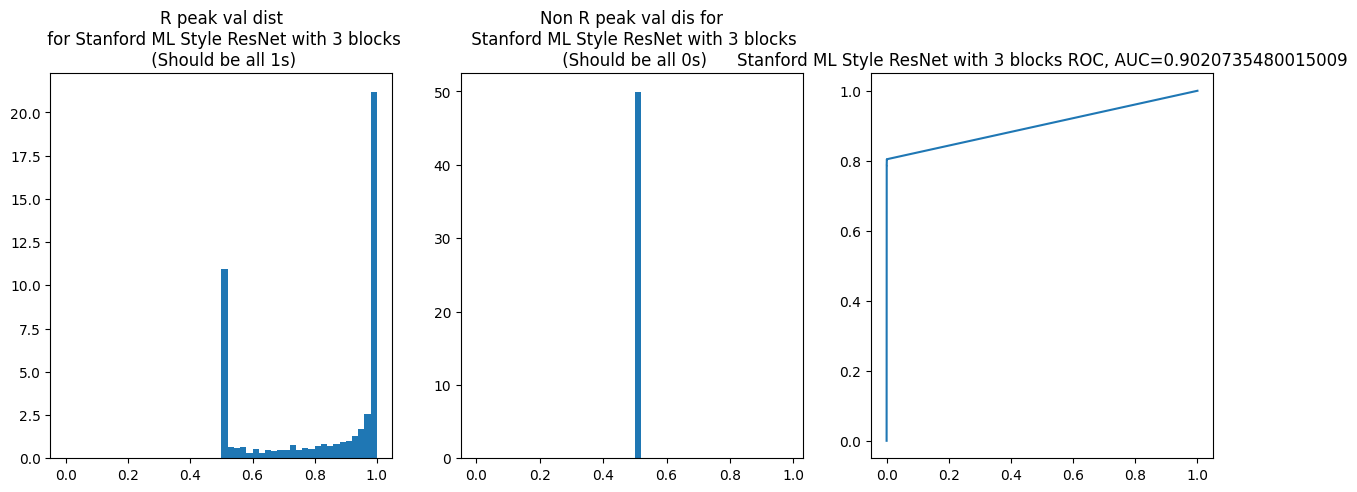

In [201]:
mods = ['Stanford ML Style ResNet with 1 blocks','Stanford ML Style ResNet with 2 blocks','Stanford ML Style ResNet with 3 blocks']
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    preds=np.concatenate([resnetExp.preds[x] for x in np.where(np.array(resnetExp.predMods)==lab)[0]])
    fig,ax=plt.subplots(1, 3,figsize=(15,5))
    ax[0].hist(preds,bins=np.arange(0, 1.02, 0.02),density=True)
    ax[0].set_title(f"R peak val dist\n for {lab}\n (Should be all 1s)")

   
    trues=np.concatenate([resnetExp.trues[x] for x in np.where(np.array(resnetExp.trueMods)==lab)[0]])
    ax[1].hist(trues,bins=np.arange(0, 1, 0.02),density=True)
    ax[1].set_title(f"Non R peak val dis for\n {lab}\n (Should be all 0s)")

    fp, tp, _ = roc_curve([1.0 for i in range(len(preds))]+[0.0 for i in range(len(trues))],np.concatenate([preds,trues]))
    auc = roc_auc_score([1.0 for i in range(len(preds))]+[0.0 for i in range(len(trues))],np.concatenate([preds,trues]))
    ax[2].plot(fp, tp)
    ax[2].set_title(f"{lab} ROC, AUC={auc}")
    plt.show()

In [78]:
lab='Stanford ML Style ResNet with 2 blocks'
preds=np.concatenate([resnetExp.preds[x] for x in np.where(np.array(resnetExp.predMods)==lab)[0]])
resNet2 = ((preds-0.5)*2-0.5)**2
waveNet = (np.concatenate(fullWaveletResnetExp.preds)-0.5)**2
scipy.stats.mannwhitneyu(np.abs(np.concatenate(fullWaveletResnetExp.preds)-0.5), np.abs((preds-0.5)*2-0.5), alternative="greater")

MannwhitneyuResult(statistic=3518082.0, pvalue=1.0)

#### Full Wavelet

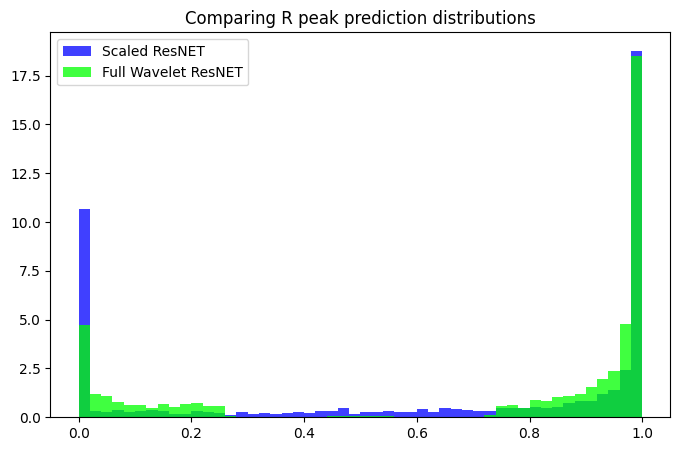

In [125]:
lab ='Stanford ML Style ResNet with 3 blocks'
preds=np.concatenate([resnetExp.preds[x] for x in np.where(np.array(resnetExp.predMods)==lab)[0]])
plt.figure(figsize=(8,5))
plt.hist((preds-np.min(preds))*2,bins=np.arange(0, 1.02, 0.02),density=True, fc=(0, 0, 1, 0.75), label="Scaled ResNET")
plt.hist(np.concatenate(fullWaveletResnetExp.preds),bins=np.arange(0, 1.02, 0.02),density=True,fc=(0, 1, 0, 0.75), label="Full Wavelet ResNET")
plt.title(f"Comparing R peak prediction distributions")
plt.legend()

In [121]:
def prop_under_05(x):
    ps = np.histogram(x,bins=np.arange(0, 1.02, 0.01),density=True)[0]
    return np.sum(ps[:len(ps)//2])/np.sum(ps)

In [126]:
scipy.stats.bootstrap([np.concatenate(fullWaveletResnetExp.preds)], prop_under_05)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.25697350069735014, high=0.2897489539748954), bootstrap_distribution=array([0.26464435, 0.2764993 , 0.2681311 , ..., 0.27615063, 0.2625523 ,
       0.2667364 ]), standard_error=0.008348577989643663)

In [127]:
scipy.stats.bootstrap([((preds-np.min(preds))*2)], prop_under_05)

BootstrapResult(confidence_interval=ConfidenceInterval(low=0.3197350069735009, high=0.3546025104602512), bootstrap_distribution=array([0.34170153, 0.31450488, 0.33158996, ..., 0.33368201, 0.33682008,
       0.32810321]), standard_error=0.00883659935416971)

Higher degreee of separation between predicted 1 and 0 classes

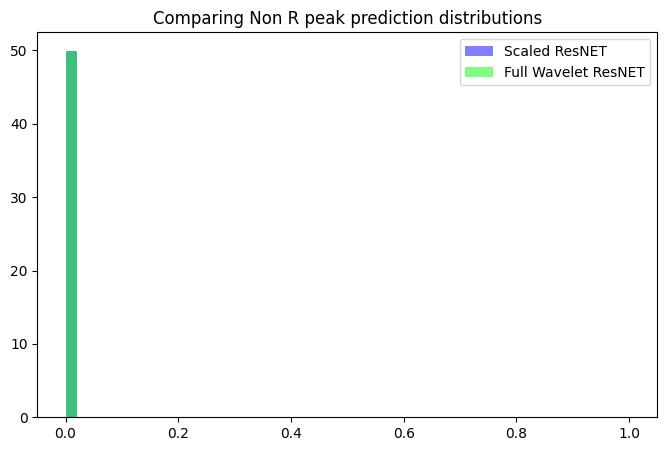

In [26]:
lab ='Stanford ML Style ResNet with 2 blocks'
preds=np.concatenate([resnetExp.trues[x] for x in np.where(np.array(resnetExp.predMods)==lab)[0]])
plt.figure(figsize=(8,5))
plt.hist((preds-np.min(preds))*2,bins=np.arange(0, 1.02, 0.02),density=True, fc=(0, 0, 1, 0.5), label="Scaled ResNET")
plt.hist(np.concatenate(fullWaveletResnetExp.trues),bins=np.arange(0, 1.02, 0.02),density=True,fc=(0, 1, 0, 0.5), label="Full Wavelet ResNET")
plt.title(f"Comparing Non R peak prediction distributions")
plt.legend()

Completely overlapping

#### Comparing the Effects of the gradient parameter

In [37]:
exp05 = hypothesis_tests.HypothesisTest("Wavelet Style ResNet with 5 blocks TLA 0.05")
exp01 = hypothesis_tests.HypothesisTest("Wavelet Style ResNet with 5 blocks TLA 0.01")

In [38]:
exp01.get_r_peak_loss()
exp05.get_r_peak_loss()
None

0 of 10, 0 of 10, 

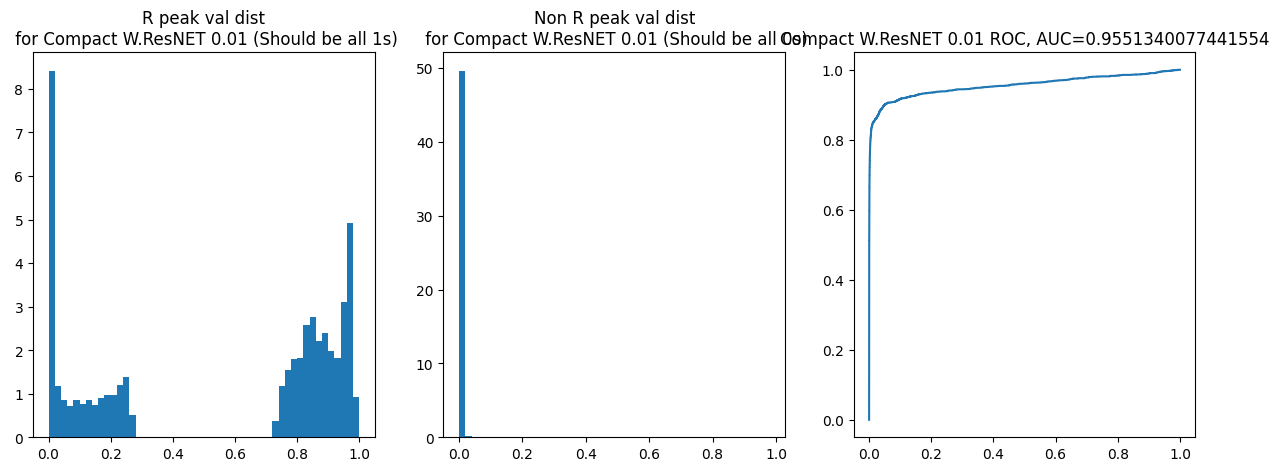

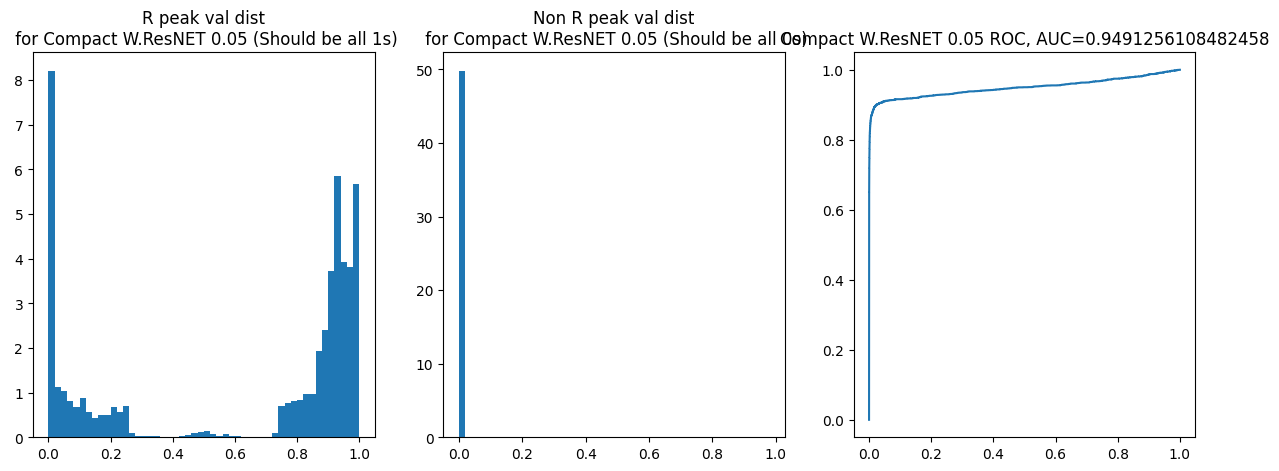

In [168]:
mods = ["Compact W.ResNET 0.01","Compact W.ResNET 0.05"]
exps = [exp01,exp05]
for i in range(len(mods)):
    lab = mods[i]
    hyp = exps[i]
    preds=np.concatenate(hyp.preds)
    fig,ax=plt.subplots(1, 3,figsize=(15,5))
    ax[0].hist(preds,bins=np.arange(0, 1.02, 0.02),density=True)
    ax[0].set_title(f"R peak val dist\n for {lab} (Should be all 1s)")

   
    trues=np.concatenate(hyp.trues)
    ax[1].hist(trues,bins=np.arange(0, 1, 0.02),density=True)
    ax[1].set_title(f"Non R peak val dist\n for {lab} (Should be all 0s)")

    fp, tp, _ = roc_curve([1.0 for i in range(len(preds))]+[0.0 for i in range(len(trues))],np.concatenate([preds,trues]))
    auc = roc_auc_score([1.0 for i in range(len(preds))]+[0.0 for i in range(len(trues))],np.concatenate([preds,trues]))
    ax[2].plot(fp, tp)
    ax[2].set_title(f"{lab} ROC, AUC={auc}")
    plt.show()

### Contrast these histograms

In [40]:
scipy.stats.mannwhitneyu(np.concatenate(fullWaveletResnetExp.preds), np.concatenate(exp01.preds), alternative="greater")

MannwhitneyuResult(statistic=5712447.0, pvalue=7.560243580677618e-144)

There is a definite imrpovement in the full model's ability to identify the R peaks

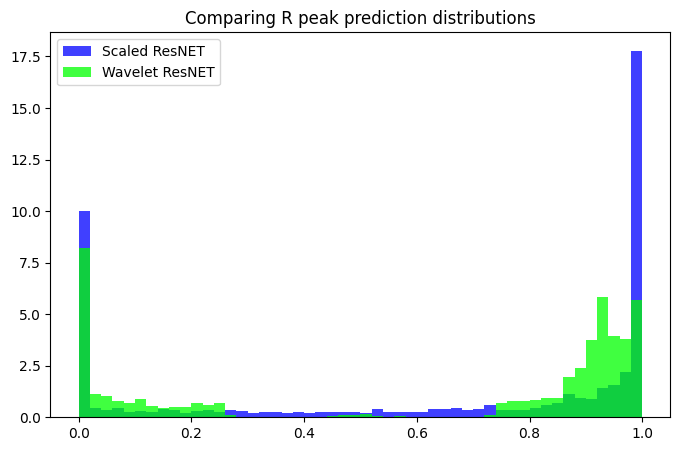

In [209]:
lab ='Stanford ML Style ResNet with 2 blocks',
preds=np.concatenate([resnetExp.preds[x] for x in np.where(np.array(resnetExp.predMods)==lab)[0]])
plt.figure(figsize=(8,5))
plt.hist((preds-np.min(preds))*2,bins=np.arange(0, 1.02, 0.02),density=True, fc=(0, 0, 1, 0.75), label="Scaled ResNET")
plt.hist(np.concatenate(exp05.preds),bins=np.arange(0, 1.02, 0.02),density=True,fc=(0, 1, 0, 0.75), label="Wavelet ResNET")
plt.title(f"Comparing R peak prediction distributions")
plt.legend()

In [246]:
resNet2 = resnetExp.final_val_losses[10:20]
waveNet = exp05.get_val_loss()
import scipy
scipy.stats.mannwhitneyu(waveNet, resNet2, alternative="less")

MannwhitneyuResult(statistic=0.0, pvalue=9.133589555477501e-05)